In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split#集成的划分训练集模型
from sklearn.neighbors import KNeighborsClassifier#KNN分类器
from sklearn.model_selection import cross_val_score#k折交叉验证
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
#读取excel
AF_input_frame=pd.read_excel('pre_treatment_data.xlsx',sheet_name='AF_input')
nonAF_input_frame=pd.read_excel('pre_treatment_data.xlsx',sheet_name='nonAF_input')
AF_label_frame=pd.read_excel('pre_treatment_data.xlsx',sheet_name='AF_label')
nonAF_label_frame=pd.read_excel('pre_treatment_data.xlsx',sheet_name='nonAF_label')

#将data_frame转化为numpy的ndarry的格式
AF_input=AF_input_frame.to_numpy()
nonAF_input=nonAF_input_frame.to_numpy()
AF_label=AF_label_frame.to_numpy()
nonAF_label=nonAF_label_frame.to_numpy()

AF_label=AF_label.flatten()#二维转一维，所有值在一维里
nonAF_label=nonAF_label.flatten()

In [4]:
raw_x=np.concatenate([AF_input,nonAF_input])#数据集x
raw_y=np.concatenate([AF_label[0:],nonAF_label[0:]])#标签y
raw_x1=raw_x[:,[0,1,2,4,5,7]]
raw_x2=raw_x[:,[0,1,2,4,7]]
raw_x3=raw_x[:,[1,2,4,5,7]]
raw_x4=raw_x[:,[1,2,4,7]]

In [5]:
ss=StandardScaler()
std_x1=ss.fit_transform(raw_x1)
std_x2=ss.fit_transform(raw_x1)
std_x3=ss.fit_transform(raw_x1)
std_x4=ss.fit_transform(raw_x1)

In [6]:
raw_x1.shape

(40480, 6)

0.8970355731225297
0.8974555335968379
0.8972579051383398
0.8974555335968379
0.8973814229249012
0.8973567193675889


(110.0, 116.0)

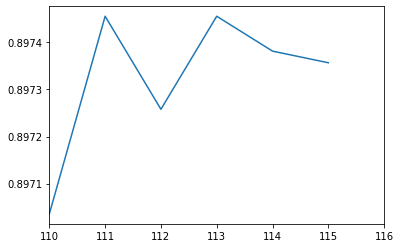

In [14]:
acc_list=[]
ss=StandardScaler()
std_x1=ss.fit_transform(raw_x1)
pca=PCA(n_components=6,whiten='full')
pca.fit(std_x1)
std_x1PCA=pca.transform(std_x1)
k=10
m=100#p值的方位
m_min=110
m_max=115
m_interval=1
index=np.array(range(m_min,m_max+1,m_interval))#第几次的实验序号
for i in range(m_min,m_max+1,m_interval):#要保持x和y的维度一样
    model=KNeighborsClassifier(n_neighbors=i,weights='uniform',p=2)
    acc=cross_val_score(model,std_x1PCA,raw_y,cv=k,scoring='accuracy')
    mean_acc=np.array(acc).mean()
    print(mean_acc)
    acc_list.append(mean_acc)
plt.plot(index,np.array(acc_list))
plt.xlim(m_min,m_max+1)

0.8823616600790514
0.8919960474308299
0.8946146245059289
0.8950592885375495
0.8948369565217391
0.8942440711462449
0.8946887351778654
0.8944169960474309
0.8940958498023714
0.8940217391304348


(1.0, 21.0)

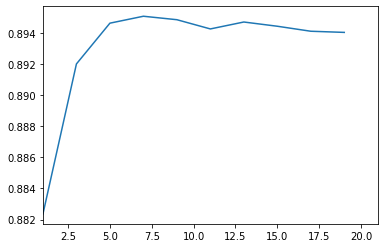

In [49]:
acc_list=[]

ss=StandardScaler()
std_x2=ss.fit_transform(raw_x2)

pca=PCA(n_components=5,whiten='full')
pca.fit(std_x2)
std_x2PCA=pca.transform(std_x2)

k=10
m=100#p值的方位
m_min=8
m_max=13
m_interval=1
index=np.array(range(m_min,m_max+1,m_interval))#第几次的实验序号
for i in range(m_min,m_max+1,m_interval):#要保持x和y的维度一样
    model=KNeighborsClassifier(n_neighbors=i,weights='distance',p=5)
    acc=cross_val_score(model,std_x2PCA,raw_y,cv=k,scoring='accuracy')
    mean_acc=np.array(acc).mean()
    print(mean_acc)
    acc_list.append(mean_acc)
plt.plot(index,np.array(acc_list))
plt.xlim(m_min,m_max+1)

0.8963438735177865
0.8962944664031619
0.8961956521739131
0.8963191699604744
0.8959239130434783
0.8958498023715415
0.8958250988142293
0.8958498023715414
0.895528656126482
0.8952569169960475
0.8955039525691699


(340.0, 441.0)

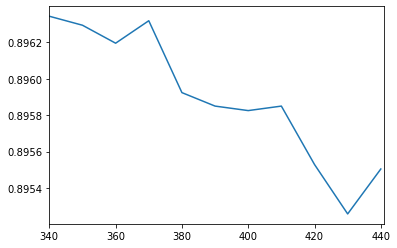

In [13]:
#raw_x3,uniform,p=2，k=170
acc_list=[]
ss=StandardScaler()
std_x3=ss.fit_transform(raw_x3)

pca=PCA(n_components=5,whiten='full')
pca.fit(std_x3)
std_x3PCA=pca.transform(std_x3)

k=10
m=26#p值的方位
m_min=340
m_max=440
m_interval=10
index=np.array(range(m_min,m_max+1,m_interval))#第几次的实验序号
for i in range(m_min,m_max+1,m_interval):#要保持x和y的维度一样
    model=KNeighborsClassifier(n_neighbors=i,weights='uniform',p=2)
    acc=cross_val_score(model,std_x3PCA,raw_y,cv=k,scoring='accuracy')
    mean_acc=np.array(acc).mean()
    print(mean_acc)
    acc_list.append(mean_acc)
plt.plot(index,np.array(acc_list))
plt.xlim(m_min,m_max+1)

0.8053853754940711
0.8176630434782608
0.8423418972332015
0.839945652173913
0.8470355731225296
0.8457262845849802
0.8487648221343873
0.8479001976284584
0.850197628458498
0.8489624505928853
0.8505187747035572
0.85
0.8509634387351779
0.8505681818181818
0.8517045454545455
0.8514081027667985
0.8520256916996048
0.852149209486166
0.8537796442687748
0.8536561264822135


(1.0, 101.0)

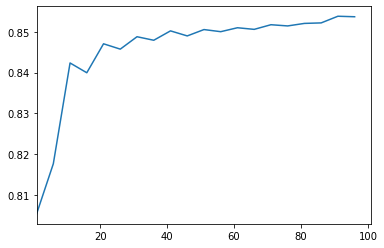

In [46]:
acc_list=[]
15,25
ss=StandardScaler()
std_x4=ss.fit_transform(raw_x4)

pca=PCA(n_components=4,whiten='full')
pca.fit(std_x4)
std_x4PCA=pca.transform(std_x4)

k=10
m=100#p值的方位
m_min=1
m_max=100
m_interval=5
index=np.array(range(m_min,m_max+1,m_interval))#第几次的实验序号
for i in range(m_min,m_max+1,m_interval):#要保持x和y的维度一样
    model=KNeighborsClassifier(n_neighbors=i,weights='uniform',p=2)
    acc=cross_val_score(model,std_x4PCA,raw_y,cv=k,scoring='accuracy')
    mean_acc=np.array(acc).mean()
    print(mean_acc)
    acc_list.append(mean_acc)
plt.plot(index,np.array(acc_list))
plt.xlim(m_min,m_max+1)